Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        8 non-null      int64  
 1   Salesman  8 non-null      object 
 2   Sales     7 non-null      float64
 3   P Type    8 non-null      object 
 4   Channel   6 non-null      object 
 5   Address   8 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 516.0+ bytes
Missing Values:
Transformed DataFrame for sample_file_1:

Transformed DataFrame for sample_file_2:
Merged DataFrame:
Descriptive Statistics:
Total Sales: 234455.0
Average Order Value: 33493.57142857143
Product Category Distribution:
P Type
Grocery        0.125
Food           0.125
Clothing       0.125
Medicines      0.125
Waste          0.125
Electronics    0.125
Breverages     0.125
Stationary     0.125
Name: proportion, dtype: float64


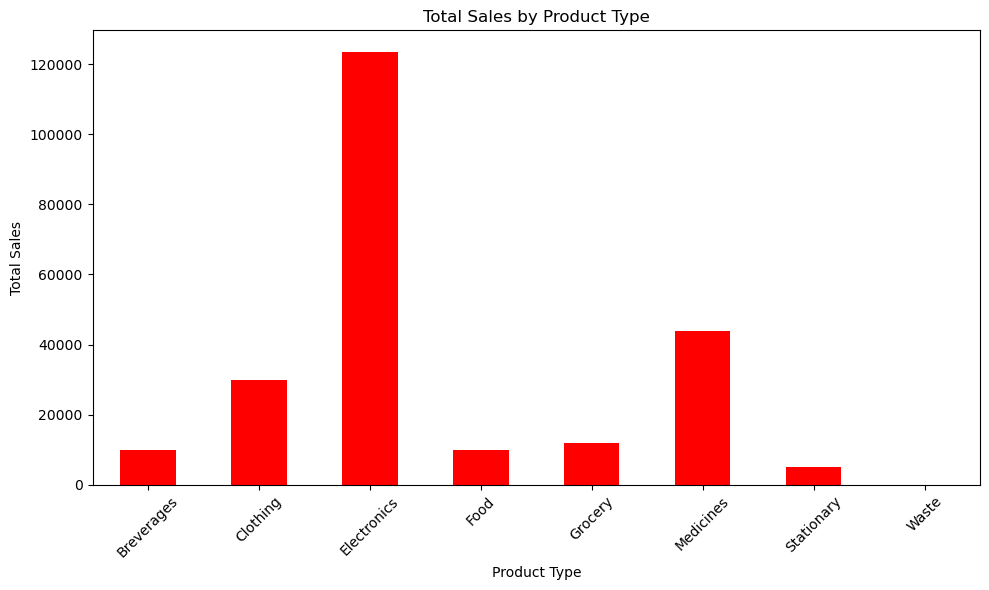

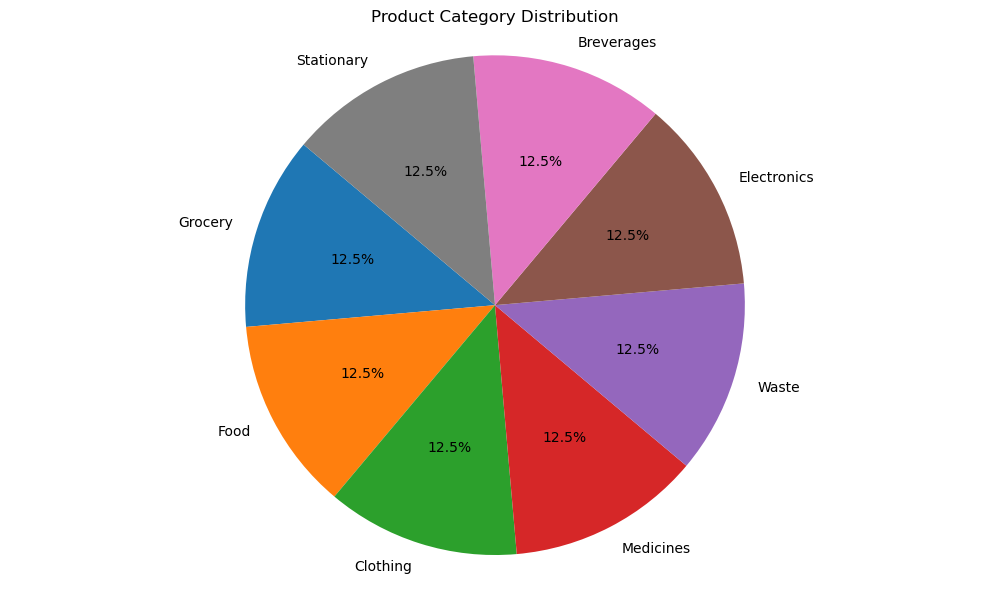

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sample_dataset.csv")
df

print("Data Structure:")
df.head()

df.shape
df.info()

print("Missing Values:")
df.isnull().sum()
df['Sales'].fillna(0, inplace=True)
df['Sales'] = df['Sales'].astype(int)
df['Channel'] = df['Channel'].fillna('Unknown').str.lower()
df.isnull().sum()
df


df['Channel'] = df['Channel'].replace(['offline', 'online'], [0, 1])
df




df_file1 = pd.read_csv('sample_file_1.csv')
df_file2 = pd.read_csv('sample_file_2.csv')
# Split start_date column into 'Year', 'Month', and 'Day' columns for file1_7
df_file1[['Year', 'Month', 'Day']] = df_file1['start_date'].str.split('-', expand=True)
# Split start_date column into 'Year', 'Month', and 'Day' columns for file2_7
df_file2[['Year', 'Month', 'Day']] = df_file2['start_date'].str.split('-', expand=True)
print("Transformed DataFrame for sample_file_1:")
df_file1

print("\nTransformed DataFrame for sample_file_2:")
df_file2

# Read data from CSV files
df_file1 = pd.read_csv('sample_file_1.csv')
df_file2 = pd.read_csv('sample_file_2.csv')
# Merge datasets based on 'id' column
merged_df = pd.concat([df_file1, df_file2], ignore_index=True)
# Display the merged DataFrame
print("Merged DataFrame:")
merged_df


sales_data = pd.read_csv('sample_dataset.csv')
print("Descriptive Statistics:")
sales_data.describe()

total_sales = sales_data['Sales'].sum()
print("Total Sales:", total_sales)

average_order_value = sales_data['Sales'].mean()
print("Average Order Value:", average_order_value)

product_category_distribution = sales_data['P Type'].value_counts(normalize=True)
print("Product Category Distribution:")
print(product_category_distribution)

plt.figure(figsize=(10, 6))
product_type_sales = sales_data.groupby('P Type')['Sales'].sum()
product_type_sales.plot(kind='bar', color='red')
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
product_category_distribution = sales_data['P Type'].value_counts()
plt.pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Category Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()